# synthetic_features and outliers

## 设置

导入之前写的函数

In [1]:
import my_linear_regressor

Training model...
RMSE (on training data):
  period 00 : 225.63
  period 01 : 214.42
  period 02 : 204.04
  period 03 : 196.42
  period 04 : 187.86
  period 05 : 181.89
  period 06 : 175.66
  period 07 : 171.74
  period 08 : 168.28
  period 09 : 166.74
Model training finished.


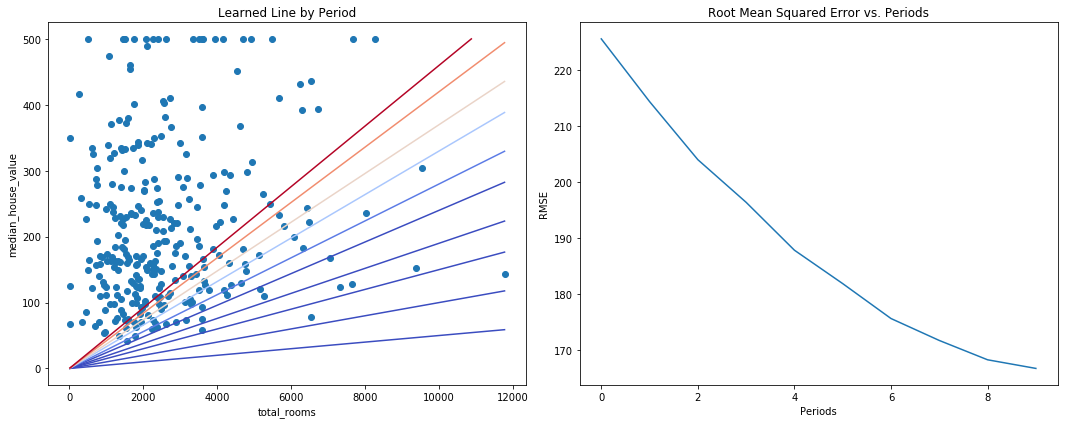

,predictions,targets
count,17000.0,17000.0
mean,121.6,207.3
std,100.3,116.0
min,0.1,15.0
25%,67.3,119.4
50%,97.8,180.4
75%,145.0,265.0
max,1745.1,500.0


Final RMSE (on training data): 166.74


In [2]:
my_linear_regressor.train_model(
    learning_rate=0.00010,
    steps=100,
    batch_size=1
)

## 合成特征

total_rooms 和 population 特征都会统计指定街区的相关总计数据。

但是，如果一个街区比另一个街区的人口更密集，会怎么样？我们可以创建一个合成特征（即 total_rooms 与 population 的比例）来探索街区人口密度与房屋价值中位数之间的关系。

在以下单元格中，创建一个名为 rooms_per_person 的特征，并将其用作 train_model() 的 input_feature。

通过调整学习速率，使用这一特征可以获得的最佳效果是什么？（效果越好，回归线与数据的拟合度就越高，最终 RMSE 也会越低。）

Training model...
RMSE (on training data):
  period 00 : 212.73
  period 01 : 189.63
  period 02 : 169.43
  period 03 : 153.05
  period 04 : 140.60
  period 05 : 133.44
  period 06 : 131.44
  period 07 : 130.72
  period 08 : 131.22
  period 09 : 132.40
Model training finished.


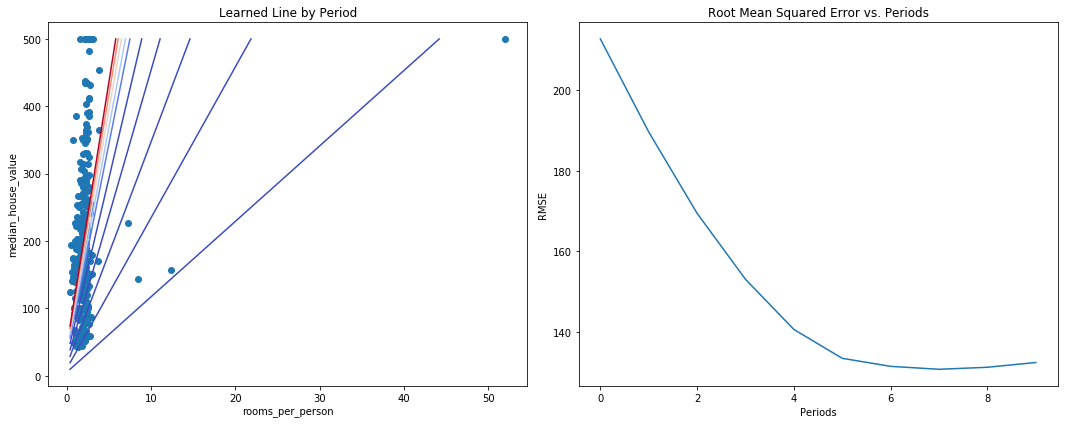

,predictions,targets
count,17000.0,17000.0
mean,200.3,207.3
std,91.9,116.0
min,46.1,15.0
25%,164.2,119.4
50%,197.2,180.4
75%,225.2,265.0
max,4383.9,500.0


Final RMSE (on training data): 132.40


In [4]:
california_housing_dataframe = my_linear_regressor.california_housing_dataframe
california_housing_dataframe['rooms_per_person'] = (california_housing_dataframe['total_rooms'] / california_housing_dataframe['population'])

calibration_data = my_linear_regressor.train_model(
    learning_rate=0.05,
    steps=500,
    batch_size=5,
    input_feature='rooms_per_person'
)

## 识别离群值

我们可以通过创建预测值与目标值的散点图来可视化模型效果。理想情况下，这些值将位于一条完全相关的对角线上。

使用在上面训练过的人均房间数模型，并使用 Pyplot 的 scatter() 创建预测值与目标值的散点图。

您是否看到任何异常情况？通过查看 rooms_per_person 中值的分布情况，将这些异常情况追溯到源数据。

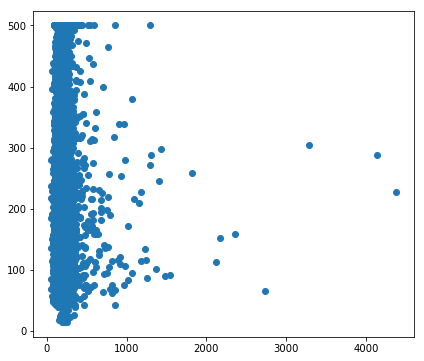

In [8]:
from matplotlib import cm
from matplotlib import gridspec
import matplotlib.pyplot as plt

plt.close()
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(calibration_data['predictions'], calibration_data['targets'])
plt.show()

校准数据显示，大多数散点与一条线对齐。这条线几乎是垂直的，这个稍后再讲解。现在，我们重点关注偏离这条线的点。我们注意到这些点的数量相对较少。

如果我们绘制 rooms_per_person 的直方图，则会发现我们的输入数据中有少量离群值：

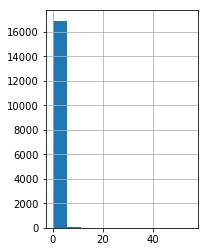

In [10]:
%matplotlib inline
plt.subplot(1, 2, 2)
_ = california_housing_dataframe["rooms_per_person"].hist()


## 截取离群值

可以通过将 rooms_per_person 的离群值设置为相对合理的最小值或最大值来进一步改进模型拟合情况。从上面的直方图可以看到，绝大多数的值都小于5，因此我们截取5。

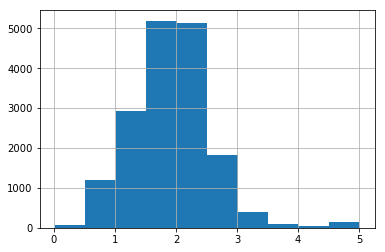

In [11]:
california_housing_dataframe['rooms_per_person'] = (
    california_housing_dataframe['rooms_per_person']).apply(lambda x: min(x, 5))
_ = california_housing_dataframe['rooms_per_person'].hist()

重新训练模型

Training model...
RMSE (on training data):
  period 00 : 212.85
  period 01 : 189.07
  period 02 : 166.72
  period 03 : 147.29
  period 04 : 130.55
  period 05 : 120.81
  period 06 : 113.91
  period 07 : 111.56
  period 08 : 109.93
  period 09 : 109.27
Model training finished.


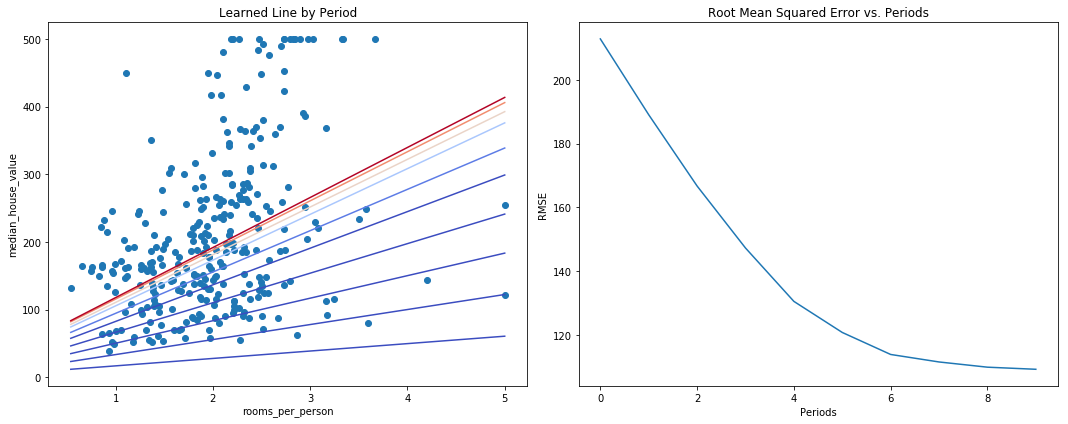

,predictions,targets
count,17000.0,17000.0
mean,187.4,207.3
std,48.5,116.0
min,45.2,15.0
25%,156.4,119.4
50%,187.4,180.4
75%,213.8,265.0
max,413.6,500.0


Final RMSE (on training data): 109.27


In [12]:
calibration_data = my_linear_regressor.train_model(
    learning_rate=0.05,
    steps=500,
    batch_size=5,
    input_feature="rooms_per_person")

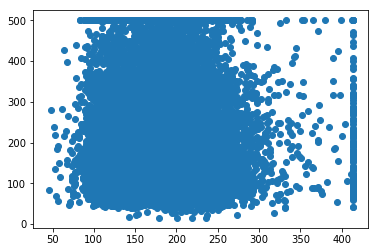

In [13]:
_ = plt.scatter(calibration_data["predictions"], calibration_data["targets"])